<a href="https://colab.research.google.com/github/yashg777/ANN/blob/main/annassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential

from keras.layers import LSTM,Activation, Dense, Flatten , Reshape , Input, Dropout, SimpleRNN
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint 

In [99]:
df = pd.read_csv("/content/Customer-Churn.csv")

In [100]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [102]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [103]:
df.drop('customerID',axis='columns',inplace=True)

In [104]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [105]:

df1 = df[df.TotalCharges!=' ']
df1.shape


(7032, 20)

In [106]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [111]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [112]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [113]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [114]:
df1.gender.unique()

array(['Female', 'Male'], dtype=object)

In [115]:
df1.replace("Male",1,inplace=True)
df1.replace("Female",0,inplace=True)

In [116]:
df1.gender.head

<bound method NDFrame.head of 0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7032, dtype: int64>

In [117]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [118]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [119]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [120]:
df2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


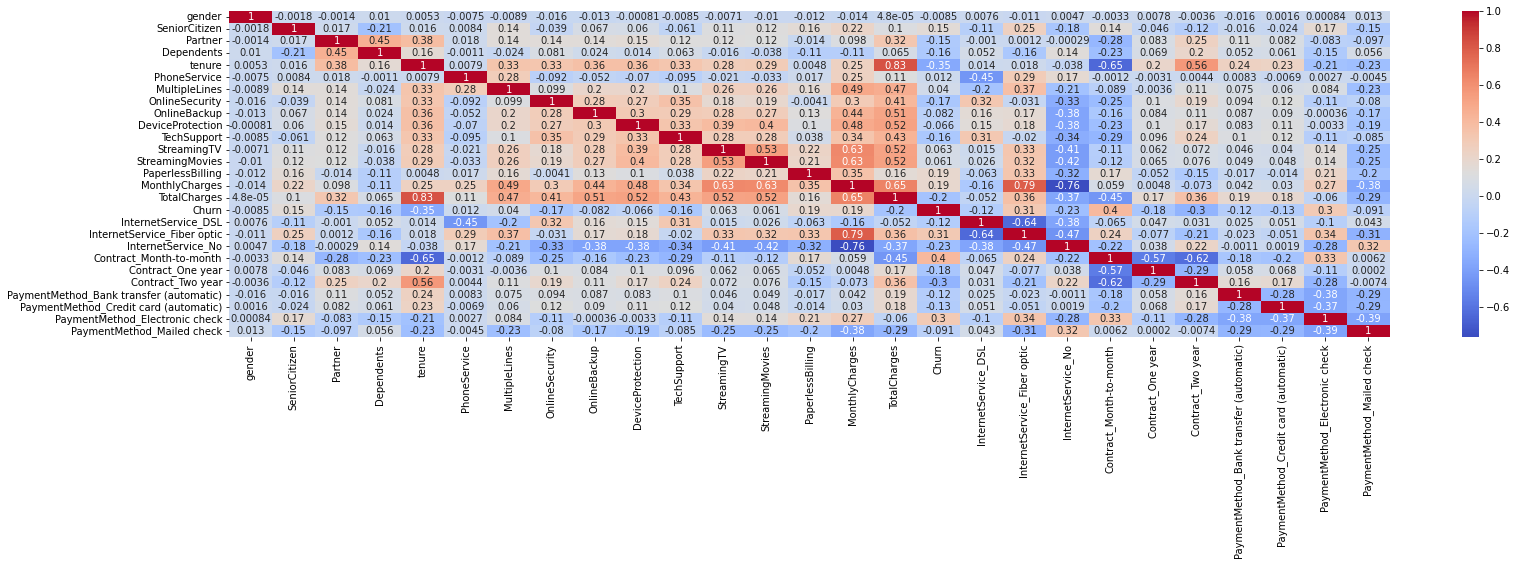

In [121]:
plt.figure(figsize=(26,6))
dataplot=sns.heatmap(df2.corr(),cmap='coolwarm',annot=True)

In [122]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [123]:
import time
MLP  = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
MLP.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
history = MLP.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
time_taken = end_time - start_time
print('Time taken to run the MLP:', time_taken, 'seconds')

Epoch 1/50
176/176 [==============================] - 2s 5ms/step - loss: 0.4728 - accuracy: 0.7692 - val_loss: 0.4525 - val_accuracy: 0.7733
Epoch 2/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.7934 - val_loss: 0.4469 - val_accuracy: 0.7846
Epoch 3/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4222 - accuracy: 0.7991 - val_loss: 0.4444 - val_accuracy: 0.7854
Epoch 4/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4205 - accuracy: 0.8021 - val_loss: 0.4448 - val_accuracy: 0.7804
Epoch 5/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4180 - accuracy: 0.8043 - val_loss: 0.4431 - val_accuracy: 0.7868
Epoch 6/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4100 - accuracy: 0.8025 - val_loss: 0.4409 - val_accuracy: 0.7903
Epoch 7/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4145 - accuracy: 0.8059 - val_loss: 0.4403 - val_accuracy: 0.7875
Epoch 

In [124]:
loss, accuracy = MLP.evaluate(X_test, y_test)
print(loss,accuracy)

44/44 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7726
0.4703940153121948 0.7725657224655151


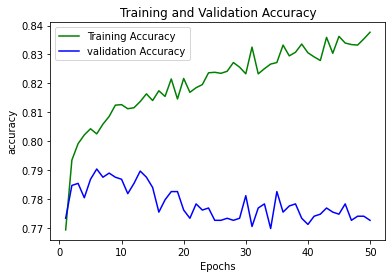

In [125]:
loss_accu = history.history['accuracy']
loss_val_accu = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_accu, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val_accu, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

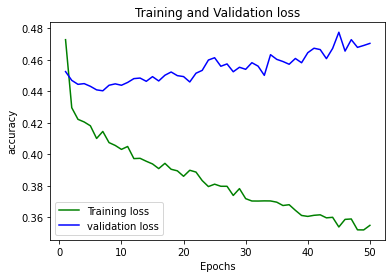

In [126]:
loss_accu = history.history['loss']
loss_val_accu = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_accu, 'g', label='Training loss')
plt.plot(epochs, loss_val_accu, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [127]:
LS_TM  = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
LS_TM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
history = LS_TM.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
time_taken = end_time - start_time
print('Time taken to run the MLP:', time_taken, 'seconds')

Epoch 1/50
176/176 [==============================] - 10s 35ms/step - loss: 0.5830 - accuracy: 0.7389 - val_loss: 0.6015 - val_accuracy: 0.7100
Epoch 2/50
176/176 [==============================] - 5s 26ms/step - loss: 0.5678 - accuracy: 0.7403 - val_loss: 0.5896 - val_accuracy: 0.7100
Epoch 3/50
176/176 [==============================] - 6s 36ms/step - loss: 0.5508 - accuracy: 0.7403 - val_loss: 0.5700 - val_accuracy: 0.7100
Epoch 4/50
176/176 [==============================] - 5s 26ms/step - loss: 0.5450 - accuracy: 0.7403 - val_loss: 0.5709 - val_accuracy: 0.7100
Epoch 5/50
176/176 [==============================] - 5s 26ms/step - loss: 0.5416 - accuracy: 0.7403 - val_loss: 0.5669 - val_accuracy: 0.7100
Epoch 6/50
176/176 [==============================] - 7s 37ms/step - loss: 0.5409 - accuracy: 0.7403 - val_loss: 0.5628 - val_accuracy: 0.7100
Epoch 7/50
176/176 [==============================] - 4s 25ms/step - loss: 0.5374 - accuracy: 0.7403 - val_loss: 0.5676 - val_accuracy: 0.710

In [128]:
loss, accuracy = LS_TM.evaluate(X_test, y_test)
print(loss,accuracy)

44/44 [==============================] - 0s 9ms/step - loss: 0.4965 - accuracy: 0.7578
0.4965367019176483 0.7578043341636658


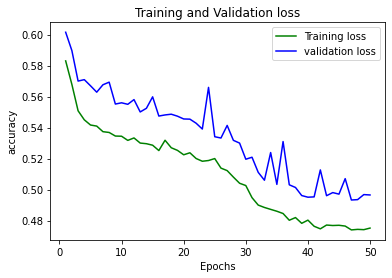

In [129]:
loss_accu = history.history['loss']
loss_val_accu = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_accu, 'g', label='Training loss')
plt.plot(epochs, loss_val_accu, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

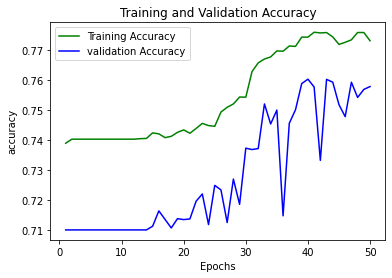

In [130]:
loss_accu = history.history['accuracy']
loss_val_accu = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_accu, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val_accu, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [131]:
RNN = Sequential([
    SimpleRNN(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
RNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
history = RNN.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
time_taken = end_time - start_time
print('Time taken to run the MLP:', time_taken, 'seconds')


Epoch 1/50
176/176 [==============================] - 7s 28ms/step - loss: 0.5689 - accuracy: 0.7394 - val_loss: 0.5986 - val_accuracy: 0.7100
Epoch 2/50
176/176 [==============================] - 3s 17ms/step - loss: 0.5416 - accuracy: 0.7409 - val_loss: 0.5554 - val_accuracy: 0.7146
Epoch 3/50
176/176 [==============================] - 3s 17ms/step - loss: 0.5245 - accuracy: 0.7481 - val_loss: 0.5362 - val_accuracy: 0.7228
Epoch 4/50
176/176 [==============================] - 3s 17ms/step - loss: 0.5114 - accuracy: 0.7547 - val_loss: 0.5337 - val_accuracy: 0.7229
Epoch 5/50
176/176 [==============================] - 5s 26ms/step - loss: 0.5059 - accuracy: 0.7573 - val_loss: 0.5161 - val_accuracy: 0.7407
Epoch 6/50
176/176 [==============================] - 3s 18ms/step - loss: 0.5015 - accuracy: 0.7582 - val_loss: 0.5413 - val_accuracy: 0.7244
Epoch 7/50
176/176 [==============================] - 3s 17ms/step - loss: 0.4975 - accuracy: 0.7613 - val_loss: 0.5218 - val_accuracy: 0.7392

In [132]:
loss, accuracy = RNN.evaluate(X_test, y_test)
print(loss,accuracy)

44/44 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.7442
0.5104604959487915 0.7442184686660767


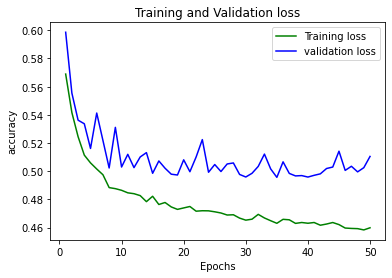

In [133]:
loss_accu = history.history['loss']
loss_val_accu = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_accu, 'g', label='Training loss')
plt.plot(epochs, loss_val_accu, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

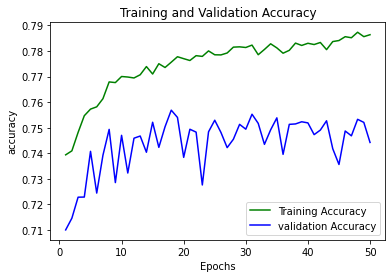

In [134]:
loss_accu = history.history['accuracy']
loss_val_accu = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_accu, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val_accu, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()